In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
df = pd.read_csv("hacktrain.csv")
df #ignore the warnings

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
class,0
20150720_N,560
20150602_N,1200
20150517_N,800
20150501_N,960
20150415_N,480
20150330_N,1120
20150314_N,720


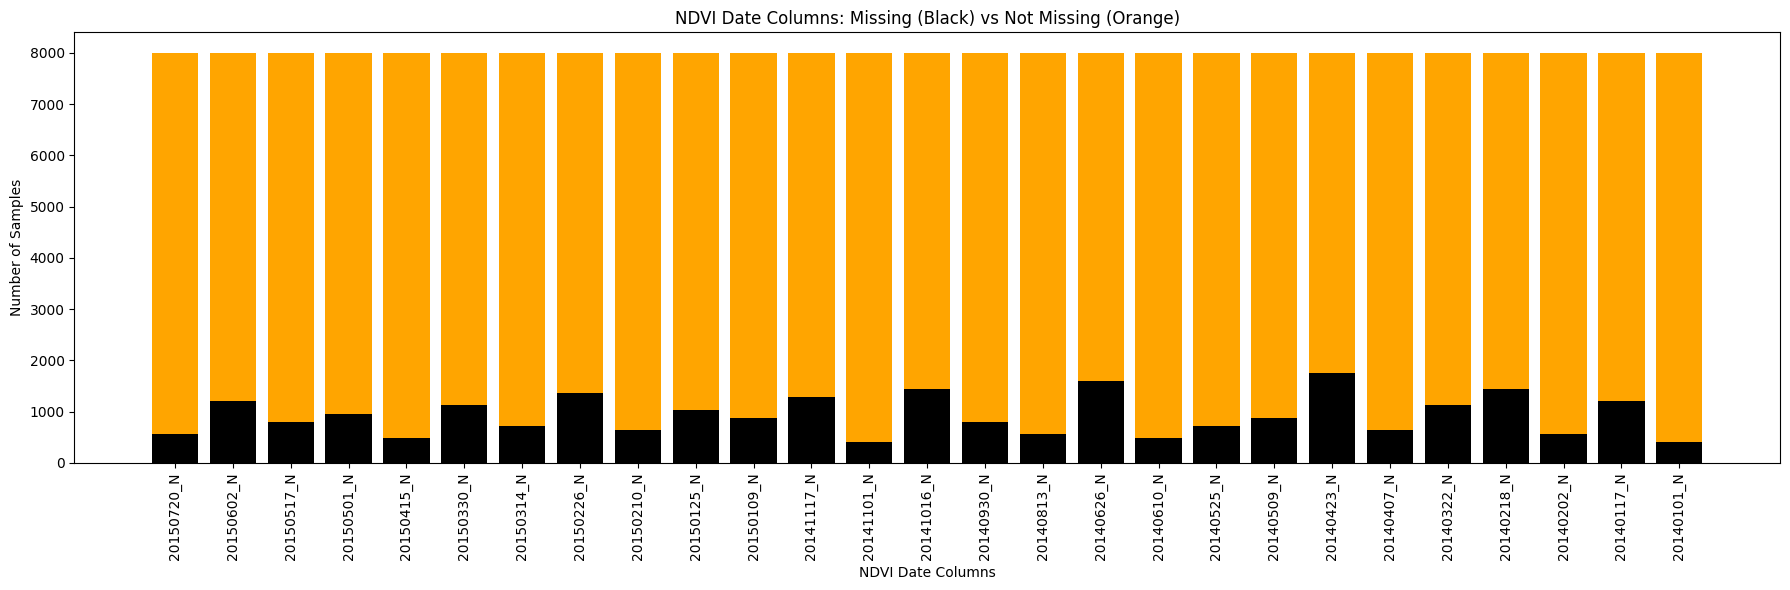

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


ndvi_columns = [col for col in df.columns if '_N' in col]


missing_counts = df[ndvi_columns].isnull().sum()
not_missing_counts = df[ndvi_columns].notnull().sum()

plt.figure(figsize=(18, 6))

for i, col in enumerate(ndvi_columns):
    total = len(df)
    missing = missing_counts[col]
    not_missing = not_missing_counts[col]

    # Draw the missing part (bottom, black)
    plt.bar(col, missing, color='black')
    # Draw the not-missing part (stacked above, orange)
    plt.bar(col, not_missing, bottom=missing, color='orange')

plt.xticks(rotation=90)
plt.title("NDVI Date Columns: Missing (Black) vs Not Missing (Orange)")
plt.ylabel("Number of Samples")
plt.xlabel("NDVI Date Columns")
plt.tight_layout()
plt.show()


In [ ]:
# df.fillna(df.mean(numeric_only=True), inplace=True) #simple mean imputation [This part has a lot of scope for imporovement.]
#keep in mind that the data is inherently noisy and the test dataset is not.

ndvi_columns = [col for col in df.columns if "_N" in col]
df[ndvi_columns] = df[ndvi_columns].interpolate(axis=1, limit_direction='both')

df.isnull().sum()

,0
Unnamed: 0,0
ID,0
class,0
20150720_N,0
20150602_N,0
20150517_N,0
20150501_N,0
20150415_N,0
20150330_N,0
20150314_N,0


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler


df.drop(columns=['ID'], inplace=True)


label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

X = df.drop(columns=['class'])
y = df['class']



model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=200,
    class_weight='balanced'

)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(classification_report(
    y_test,
    y_pred,
    labels=list(range(len(label_encoder.classes_))),
    target_names=label_encoder.classes_
))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

        farm       0.83      0.69      0.75       168
      forest       1.00      0.93      0.96      1232
       grass       0.60      0.82      0.70        39
  impervious       0.82      0.87      0.84       134
     orchard       0.10      0.50      0.17         6
       water       0.19      0.86      0.31        21

    accuracy                           0.89      1600
   macro avg       0.59      0.78      0.62      1600
weighted avg       0.94      0.89      0.91      1600



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("CV Accuracy: %.2f%%" % (scores.mean() * 100))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

CV Accuracy: 82.55%


In [ ]:
# test_data = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv")
import pandas as pd

hacktest = pd.read_csv("hacktest.csv")

# Drop ID column if present
if 'ID' in hacktest.columns:
    ids = hacktest['ID']
    hacktest.drop(columns=['ID'], inplace=True)
else:
    ids = pd.Series(range(len(hacktest)))


In [ ]:
X_hacktest_scaled = scaler.transform(hacktest)


In [ ]:
y_hacktest_pred = model.predict(X_hacktest_scaled)


In [ ]:
y_hacktest_labels = label_encoder.inverse_transform(y_hacktest_pred)


In [ ]:
submission = pd.DataFrame({
    'ID': ids,
    'class': y_hacktest_labels
})

print(submission.head())
print(submission['class'].value_counts())


   ID   class
0   1  forest
1   2  forest
2   3  forest
3   4  forest
4   5  forest
class
forest    2536
water      309
Name: count, dtype: int64


In [ ]:
print(submission['class'].value_counts(normalize=True) * 100)


class
forest    89.13884
water     10.86116
Name: proportion, dtype: float64


In [ ]:
result

,ID,class
0,1,orchard
1,2,orchard
2,3,orchard
3,4,orchard
4,5,orchard
...,...,...
2840,2841,grass
2841,2842,grass
2842,2843,grass
2843,2844,grass


In [ ]:
result.to_csv("submission.csv", index=False) #this file will appear under the output section of the right navbar. You need to submit this csv file

In [ ]:
import pandas as pd
pd.Series(y_train).value_counts()


,count
class,
1,4927
0,673
3,535
2,157
5,84
4,24


In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, f1_score
from sklearn.feature_selection import SelectKBest, f_classif



df = pd.read_csv("hacktrain.csv")


if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True)

# Interpolate NDVI columns
ndvi_columns = [col for col in df.columns if "_N" in col]
df[ndvi_columns] = df[ndvi_columns].interpolate(axis=1, limit_direction='both')

# Fill any remaining NaNs
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode class labels
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Split features and target
X = df.drop(columns=['class'])
y = df['class']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


selector = SelectKBest(score_func=f_classif, k=min(20, X.shape[1]))
X_selected = selector.fit_transform(X_scaled, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)



param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs'],
    'multi_class': ['multinomial'],
    'class_weight': ['balanced'],
    'max_iter': [300]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("✅ Best Parameters:", grid.best_params_)
model = grid.best_estimator_

#  EVALUATION ON HOLDOUT SET

y_pred = model.predict(X_test)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"🔍 Macro F1 Score: {macro_f1 * 100:.2f}%")



model.fit(X_selected, y)



hacktest = pd.read_csv("hacktest.csv")
ids = hacktest['ID'] if 'ID' in hacktest.columns else pd.Series(range(len(hacktest)))

if 'ID' in hacktest.columns:
    hacktest.drop(columns=['ID'], inplace=True)

# Interpolate and fill missing values
ndvi_columns = [col for col in hacktest.columns if "_N" in col]
hacktest[ndvi_columns] = hacktest[ndvi_columns].interpolate(axis=1, limit_direction='both')
hacktest.fillna(hacktest.median(numeric_only=True), inplace=True)

# Apply same preprocessing as training
X_hacktest_scaled = scaler.transform(hacktest)
X_hacktest_selected = selector.transform(X_hacktest_scaled)
y_hacktest_preds = model.predict(X_hacktest_selected)
y_hacktest_labels = label_encoder.inverse_transform(y_hacktest_preds)

# Check prediction distribution
print("\n📈 Prediction Distribution on HackTest:")
print(pd.Series(y_hacktest_labels).value_counts(normalize=True) * 100)

# ========== CREATE SUBMISSION ==========

submission = pd.DataFrame({
    'ID': ids,
    'class': y_hacktest_labels
})

submission.to_csv("submission.csv", index=False)
print("\n📁 Submission file saved as 'submission.csv'")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

✅ Best Parameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 300, 'multi_class': 'multinomial', 'solver': 'lbfgs'}

📊 Classification Report:
              precision    recall  f1-score   support

        farm       0.86      0.65      0.74       168
      forest       1.00      0.94      0.97      1232
       grass       0.60      0.82      0.70        39
  impervious       0.84      0.84      0.84       134
     orchard       0.13      0.83      0.22         6
       water       0.22      0.95      0.35        21

    accuracy                           0.90      1600
   macro avg       0.61      0.84      0.64      1600
weighted avg       0.95      0.90      0.91      1600

🔍 Macro F1 Score: 63.69%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



📈 Prediction Distribution on HackTest:
forest    73.286467
water     26.713533
Name: proportion, dtype: float64

📁 Submission file saved as 'submission.csv'


In [ ]:
df = pd.read_csv("submission.csv")
df.head()

,ID,class
0,1,forest
1,2,forest
2,3,forest
3,4,forest
4,5,forest


from matplotlib import pyplot as plt
_df_0['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ID'}, axis=1)
              .sort_values('ID', ascending=True))
  xs = counted['ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from sklearn.metrics import accuracy_score

# After predicting on your internal test set
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Internal Test Accuracy: {:.2f}%".format(acc * 100))


Internal Test Accuracy: 90.75%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi


✅ Best Parameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 300, 'multi_class': 'multinomial', 'solver': 'lbfgs'}

📊 Classification Report:
              precision    recall  f1-score   support

        farm       0.86      0.65      0.74       168
      forest       1.00      0.94      0.97      1232
       grass       0.60      0.82      0.70        39
  impervious       0.84      0.84      0.84       134
     orchard       0.13      0.83      0.22         6
       water       0.22      0.95      0.35        21

    accuracy                           0.90      1600
   macro avg       0.61      0.84      0.64      1600
weighted avg       0.95      0.90      0.91      1600

🔍 Macro F1 Score: 63.69%
✅ Accuracy: 89.50%


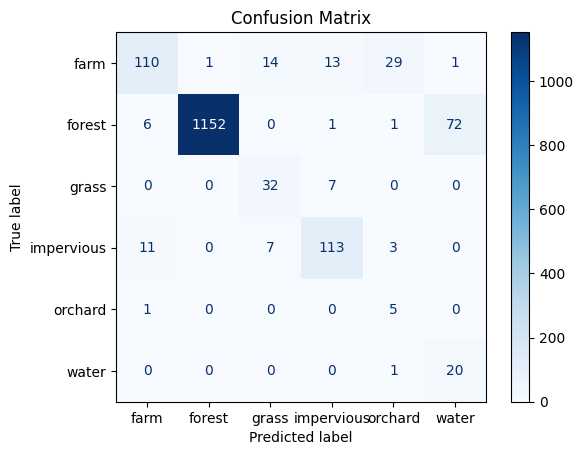


📈 Prediction Distribution on HackTest:
forest    71.704745
water     28.295255
Name: proportion, dtype: float64

📁 Submission file saved as 'submission.csv'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------ Load Data ------------------------
# Replace with your real file path
df = pd.read_csv("hacktrain.csv")

# ------------------------ Preprocessing ------------------------
# Drop ID column if present
if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True)

# Interpolate missing NDVI-like features
ndvi_columns = [col for col in df.columns if "_N" in col]
df[ndvi_columns] = df[ndvi_columns].interpolate(axis=1, limit_direction='both')

# Drop rows with remaining NaNs
df.dropna(inplace=True)

# Encode labels
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Features & target
X = df.drop(columns=['class'])
y = df['class']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


selector = SelectKBest(score_func=f_classif, k=min(20, X.shape[1]))
X_selected = selector.fit_transform(X_scaled, y)

-
X_train, X_val, y_train, y_val = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

#Logistic Regression + GridSearch
param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [300],
    'solver': ['lbfgs'],
    'multi_class': ['multinomial'],
    'class_weight': ['balanced']
}

lr = LogisticRegression()
grid = GridSearchCV(lr, param_grid, cv=5, scoring='f1_macro', verbose=0)
grid.fit(X_train, y_train)

print("\n✅ Best Parameters:", grid.best_params_)

#  Evaluation
y_pred = grid.predict(X_val)

print("\n📊 Classification Report:")
print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))
print(f"🔍 Macro F1 Score: {f1_score(y_val, y_pred, average='macro'):.2%}")
print(f"✅ Accuracy: {accuracy_score(y_val, y_pred):.2%}")

# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Load Test Data
test_df = pd.read_csv("hacktest.csv")
ids = test_df['ID']

# Interpolate missing NDVI columns
test_df[ndvi_columns] = test_df[ndvi_columns].interpolate(axis=1, limit_direction='both')
test_df.drop(columns=['ID'], inplace=True)
test_df = test_df.ffill(axis=1)


# Scale and select features
X_test_scaled = scaler.transform(test_df)
X_test_selected = selector.transform(X_test_scaled)

# Predict
y_test_pred = grid.predict(X_test_selected)
y_test_labels = label_encoder.inverse_transform(y_test_pred)

# Prediction Distribution
print("\n📈 Prediction Distribution on HackTest:")
print(pd.Series(y_test_labels).value_counts(normalize=True) * 100)

#  Create Submission File
submission = pd.DataFrame({
    'ID': ids,
    'class': y_test_labels
})
submission.to_csv("submission.csv", index=False)
print("\n📁 Submission file saved as 'submission.csv'")


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("CV Accuracy: %.2f%%" % (scores.mean() * 100))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

CV Accuracy: 82.82%
